<a href="https://colab.research.google.com/github/olusipedaniel/zero-to-mastery-exercises/blob/main/03_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Spend 20-minutes reading and interacting with the CNN explainer website.
  * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.
    * What is the kernel size?
    * What is the stride?
    * How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [1]:
# Importing tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

### 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

I have uploaded an image classifier dataset in my drive which contains 10 images of dogs and 10 images of cat

The goal is to train a classifier that will classify between a dog and cat.

In [2]:
# Mount drive to google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setting up path to image directory
train_dir="/content/drive/MyDrive/cats_and_dogs"

In [4]:
import os

# Checking the number of images in each directory
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/cats_and_dogs"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in /content/drive/MyDrive/cats_and_dogs.
There are 0 directories and 10 images in /content/drive/MyDrive/cats_and_dogs/cat.
There are 0 directories and 10 images in /content/drive/MyDrive/cats_and_dogs/dog.


In [5]:
# Using ImageDataGenerators to read in images with labels 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1/255., 
                                 validation_split = 0.2) # creating a valid split in the train data

# Grabbing our image file from directories 
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=2, 
                                             target_size=(224,224), 
                                             class_mode="binary", 
                                             seed=42, 
                                             subset="training")

valid_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=2, 
                                             target_size=(224,224), 
                                             class_mode="binary", 
                                             seed=42, 
                                             subset="validation")

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [6]:
# Get the class names programmatically
import numpy as np
import pathlib

data_dir=pathlib.Path("/content/drive/MyDrive/cats_and_dogs")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['cat', 'dog'], dtype='<U3')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Visualing random images from training images
def plot_random_images(target_dir):
  for i in range(2):
    plt.subplot(1,2,i+1)
    # Setting up target directory
    target_class=random.choice(class_names)
    target_folder=target_dir+"/"+target_class

    # Getting random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    target_image=target_folder+"/"+random_image[0]

    # Reading and plotting the image using matplotlib
    img=mpimg.imread(target_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

['006.jpg']
['020.jpg']


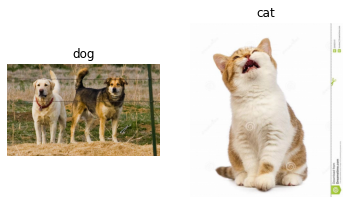

In [10]:
plot_random_images(target_dir="/content/drive/MyDrive/cats_and_dogs")

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# Setting random seed
tf.random.set_seed(42)

# Create model
model_0=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile model
model_0.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics="accuracy")

# Fit model
model_0.fit(train_data,
            epochs=10,
            validation_data=valid_data)

Epoch 1/10
8/8 [==============================] - 16s 601ms/step - loss: 0.7171 - accuracy: 0.4375 - val_loss: 0.8639 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 0.6390 - accuracy: 0.5000 - val_loss: 0.9689 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6145 - accuracy: 0.5000 - val_loss: 0.9053 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 46ms/step - loss: 0.5867 - accuracy: 0.5000 - val_loss: 0.9300 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 44ms/step - loss: 0.5696 - accuracy: 0.5000 - val_loss: 0.9228 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 0s 45ms/step - loss: 0.5559 - accuracy: 0.5000 - val_loss: 1.0033 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 50ms/step - loss: 0.5350 - accuracy: 0.6875 - val_loss: 0.8460 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=========

### 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset

In [12]:
from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler=LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [13]:
# Setting random seed
tf.random.set_seed(42)

# Create model
lr_model=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile model
lr_model.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics="accuracy")

# Fit model
lr_history=lr_model.fit(train_data,
                        epochs=10,
                        validation_data=valid_data,
                        callbacks=[lr_scheduler])

Epoch 1/10
8/8 [==============================] - 1s 67ms/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.7515 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/10
8/8 [==============================] - 0s 46ms/step - loss: 0.6750 - accuracy: 0.5000 - val_loss: 0.7584 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/10
8/8 [==============================] - 0s 50ms/step - loss: 0.6682 - accuracy: 0.5000 - val_loss: 0.7784 - val_accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/10
8/8 [==============================] - 0s 47ms/step - loss: 0.6623 - accuracy: 0.5000 - val_loss: 0.7994 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/10
8/8 [==============================] - 0s 53ms/step - loss: 0.6562 - accuracy: 0.5000 - val_loss: 0.8229 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/10
8/8 [==============================] - 0s 51ms/step - loss: 0.6582 - accuracy: 0.5000 - val_loss: 0.8072 - val_accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/10
8/8 [==============================] - 0s 50ms/step -

Text(0, 0.5, 'Loss')

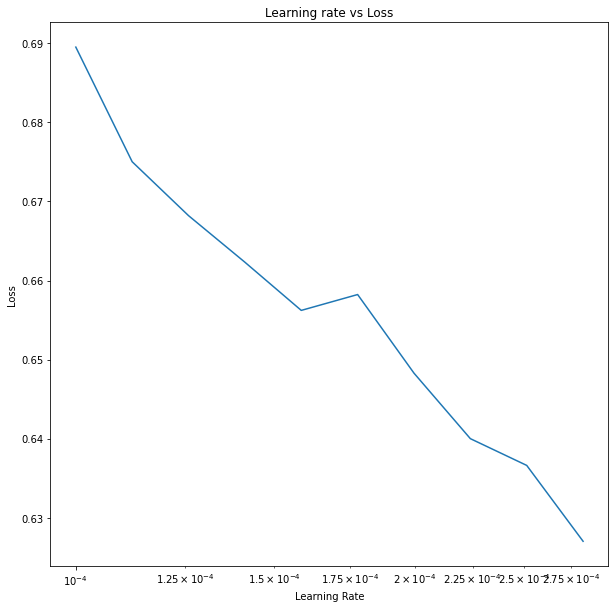

In [14]:
# Plotting learning rate curve
lr=1e-4*(10**(np.arange(10)/20))
plt.figure(figsize=(10,10))
plt.semilogx(lr,lr_history.history["loss"])
plt.title("Learning rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [17]:
lr=2*1e-4
lr

0.0002

In [18]:
# Setting random seed
tf.random.set_seed(42)

# Create model
model_1=Sequential([
  Conv2D(filters=2,
         kernel_size=1,
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(2,1,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile model
model_1.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=lr),
                metrics="accuracy")

# Fit model
history_1=model_1.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
8/8 [==============================] - 1s 65ms/step - loss: 0.6818 - accuracy: 0.5625 - val_loss: 0.7738 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 51ms/step - loss: 0.6744 - accuracy: 0.5000 - val_loss: 0.8202 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6573 - accuracy: 0.5000 - val_loss: 0.8341 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6529 - accuracy: 0.5000 - val_loss: 0.8527 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 45ms/step - loss: 0.6449 - accuracy: 0.5000 - val_loss: 0.8514 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 0s 47ms/step - loss: 0.6406 - accuracy: 0.5000 - val_loss: 0.8572 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6377 - accuracy: 0.5000 - val_loss: 0.8232 - val_accuracy: 0.5000
Epoch 8/10
8/8 [===========

#### In order to improve the model, more data will be needed